<h1>Richter's Predictor: Modeling Earthquake Damage</h1>

In this notebook I analyze data from DrivenData competition: https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/.

_My goal is to get some practice in exploratory data analysis, and to test some simple models. It's likely that the performance of those models won't be great at first but I intend to improve them later._

<h3>Problem Overview</h3>

From DriveData website: "Based on aspects of building location and construction, your goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

The data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics."

<h3>Problem Description</h3>

I am going to predict the ordinal variable <font color='blue'>damage_grade</font>, which represents the level of damage to the building that was hit by the earthquake. There are 3 grades of damage:
<ul>
    <li> 1: represents low damage</li>
    <li> 2: represents a medium amount of damage</li>
    <li> 3: represents almost complete destruction</li>
</ul>

The dataset mainly consists of information about the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the <font color='blue'>building_id</font> column is a unique and random identifier. Categorical variables have been obfuscated by random lowercase ascii characters. _The appearance of the same character in distinct columns does not imply the same original value._
The remaining 38 features are described below.

<ul>
    <li><font color='blue'>geo_level_1_id</font>, <font color='blue'>geo_level_2_id</font>, <font color='blue'>geo_level_3_id (type: int)</font>: geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.</li>
    <li><font color='blue'>count_floors_pre_eq (type: int)</font>: number of floors in the building before the earthquake.</li>
    <li><font color='blue'>age (type: int)</font>: age of the building in years.</li>
    <li><font color='blue'>area_percentage (type: int)</font>: normalized area of the building footprint.</li>
    <li><font color='blue'>height_percentage (type: int)</font>: normalized height of the building footprint.</li>
    <li><font color='blue'>land_surface_condition (type: categorical)</font>: surface condition of the land where the building was built. Possible values: n, o, t.</li>
    <li><font color='blue'>foundation_type (type: categorical)</font>: type of foundation used while building. Possible values: h, i, r, u, w.</li>
    <li><font color='blue'>roof_type (type: categorical)</font>: type of roof used while building. Possible values: n, q, x.</li>
    <li><font color='blue'>ground_floor_type (type: categorical)</font>: type of the ground floor. Possible values: f, m, v, x, z.</li>
    <li><font color='blue'>other_floor_type (type: categorical)</font>: type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.</li>
    <li><font color='blue'>position (type: categorical)</font>: position of the building. Possible values: j, o, s, t.</li>
    <li><font color='blue'>plan_configuration (type: categorical)</font>: building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.</li>
    <li><font color='blue'>has_superstructure_adobe_mud (type: binary)</font>: flag variable that indicates if the superstructure was made of Adobe/Mud.</li>
    <li><font color='blue'>has_superstructure_mud_mortar_stone (type: binary)</font>: flag variable that indicates if the superstructure was made of Mud Mortar - Stone.</li>
    <li><font color='blue'>has_superstructure_stone_flag (type: binary)</font>: flag variable that indicates if the superstructure was made of Stone.</li>
    <li><font color='blue'>has_superstructure_cement_mortar_stone (type: binary)</font>: flag variable that indicates if the superstructure was made of Cement Mortar - Stone.</li>
    <li><font color='blue'>has_superstructure_mud_mortar_brick (type: binary)</font>: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.</li>
    <li><font color='blue'>has_superstructure_cement_mortar_brick (type: binary)</font>: flag variable that indicates if the superstructure was made of Cement Mortar - Brick.</li>
    <li><font color='blue'>has_superstructure_timber (type: binary)</font>: flag variable that indicates if the superstructure was made of Timber.</li>
    <li><font color='blue'>has_superstructure_bamboo (type: binary)</font>: flag variable that indicates if the superstructure was made of Bamboo.</li>
    <li><font color='blue'>has_superstructure_rc_non_engineered (type: binary)</font>: flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.</li>
    <li><font color='blue'>has_superstructure_rc_engineered (type: binary)</font>: flag variable that indicates if the superstructure was made of engineered reinforced concrete.</li>
    <li><font color='blue'>has_superstructure_other (type: binary)</font>: flag variable that indicates if the superstructure was made of any other material.</li>
    <li><font color='blue'>legal_ownership_status (type: categorical)</font>: legal ownership status of the land where building was built. Possible values: a, r, v, w.</li>
    <li><font color='blue'>count_families (type: int)</font>: number of families that live in the building.</li>
    <li><font color='blue'>has_secondary_use (type: binary)</font>: flag variable that indicates if the building was used for any secondary purpose.</li>
    <li><font color='blue'>has_secondary_use_agriculture (type: binary)</font>: flag variable that indicates if the building was used for agricultural purposes.</li>
    <li><font color='blue'>has_secondary_use_hotel (type: binary)</font>: flag variable that indicates if the building was used as a hotel.</li>
    <li><font color='blue'>has_secondary_use_rental (type: binary)</font>: flag variable that indicates if the building was used for rental purposes.</li>
    <li><font color='blue'>has_secondary_use_institution (type: binary)</font>: flag variable that indicates if the building was used as a location of any institution.</li>
    <li><font color='blue'>has_secondary_use_school (type: binary)</font>: flag variable that indicates if the building was used as a school.</li>
    <li><font color='blue'>has_secondary_use_industry (type: binary)</font>: flag variable that indicates if the building was used for industrial purposes.</li>
    <li><font color='blue'>has_secondary_use_health_post (type: binary)</font>: flag variable that indicates if the building was used as a health post.</li>
    <li><font color='blue'>has_secondary_use_gov_office (type: binary)</font>: flag variable that indicates if the building was used fas a government office.</li>
    <li><font color='blue'>has_secondary_use_use_police (type: binary)</font>: flag variable that indicates if the building was used as a police station.</li>
    <li><font color='blue'>has_secondary_use_other (type: binary)</font>: flag variable that indicates if the building was secondarily used for other purposes.</li>
</ul>

<h4>Let's Start</h4>

First of all I have to import some useful libraries and get the dataset files from DrivenData website. The <font color='blue'>building_id</font> can be the index of the Data Frames, as it is a unique key that identifies each instance in the dataset.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_path = 'D:\Documents\Google Drive\Competicoes\DrivenData\Earthquake'
train_data_file = os.path.join(data_path,'train_values.csv')
train_label_file = os.path.join(data_path,'train_labels.csv')
test_data_file = os.path.join(data_path,'test_values.csv')

#loading train data and labels
train_data = pd.read_csv(train_data_file, index_col='building_id')
label_data = pd.read_csv(train_label_file, index_col='building_id')

print("Datasets Loaded.")

Datasets Loaded.


In [2]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
label_data.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


The labels and the instances in the training dataset are linked by the index: <font color='blue'>building_id</font>.

Now, let's get some information about the training dataset:

In [4]:
#DataFrame.info() from pandas can provide all these information except unique values, I know...
#but I'de like to practice a little bit

#get data info and unique values
def get_data_info(data):
    #amount of null values
    nanvals = [data[x].isna().sum() for x in data.columns]
    #data type
    dt = data.dtypes.values
    #unique values
    uniq = [data[x].unique() for x in data.columns]
    info_dc = {'column':data.columns, 'null_values':nanvals, 'dtype':dt, 'unique_vals':uniq}
    return(pd.DataFrame(info_dc))

datainfo = get_data_info(train_data)
datainfo

,column,null_values,dtype,unique_vals
0,geo_level_1_id,0,int64,"[6, 8, 21, 22, 11, 9, 20, 0, 26, 17, 12, 18, 4..."
1,geo_level_2_id,0,int64,"[487, 900, 363, 418, 131, 558, 475, 323, 757, ..."
2,geo_level_3_id,0,int64,"[12198, 2812, 8973, 10694, 1488, 6089, 12066, ..."
3,count_floors_pre_eq,0,int64,"[2, 3, 1, 4, 5, 6, 7, 8, 9]"
4,age,0,int64,"[30, 10, 25, 0, 15, 20, 45, 55, 5, 40, 80, 60,..."
5,area_percentage,0,int64,"[6, 8, 5, 9, 3, 13, 7, 4, 12, 16, 11, 27, 10, ..."
6,height_percentage,0,int64,"[5, 7, 9, 4, 6, 3, 10, 8, 2, 32, 12, 11, 13, 1..."
7,land_surface_condition,0,object,"[t, o, n]"
8,foundation_type,0,object,"[r, w, i, u, h]"
9,roof_type,0,object,"[n, q, x]"


This information was basicaly given in the problem description, but it's good to check and to confirm them.

It is interesting to see that no registry has null values. So it will not be necessary to deal with missing data.

<h3>Exploratory Data Analysis</h3>

Now, let's separate the ordinal data from categorical data. I consider the binary attributes as categorical data as well.
In the following step I'm going to see some estatistics and histograms from ordinal attributes.

In [5]:
#I've decided to keep the building_id in both parts of dataset
cat_attrs = train_data.columns[7:26].append(train_data.columns[27:38])
ord_attrs = train_data.columns[0:7].append(train_data.columns[26:27])

train_data_c = train_data[cat_attrs].copy()
train_data_o = train_data[ord_attrs].copy()

train_data_o.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.983949
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.418389
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,1.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,1.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,1.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,9.000000


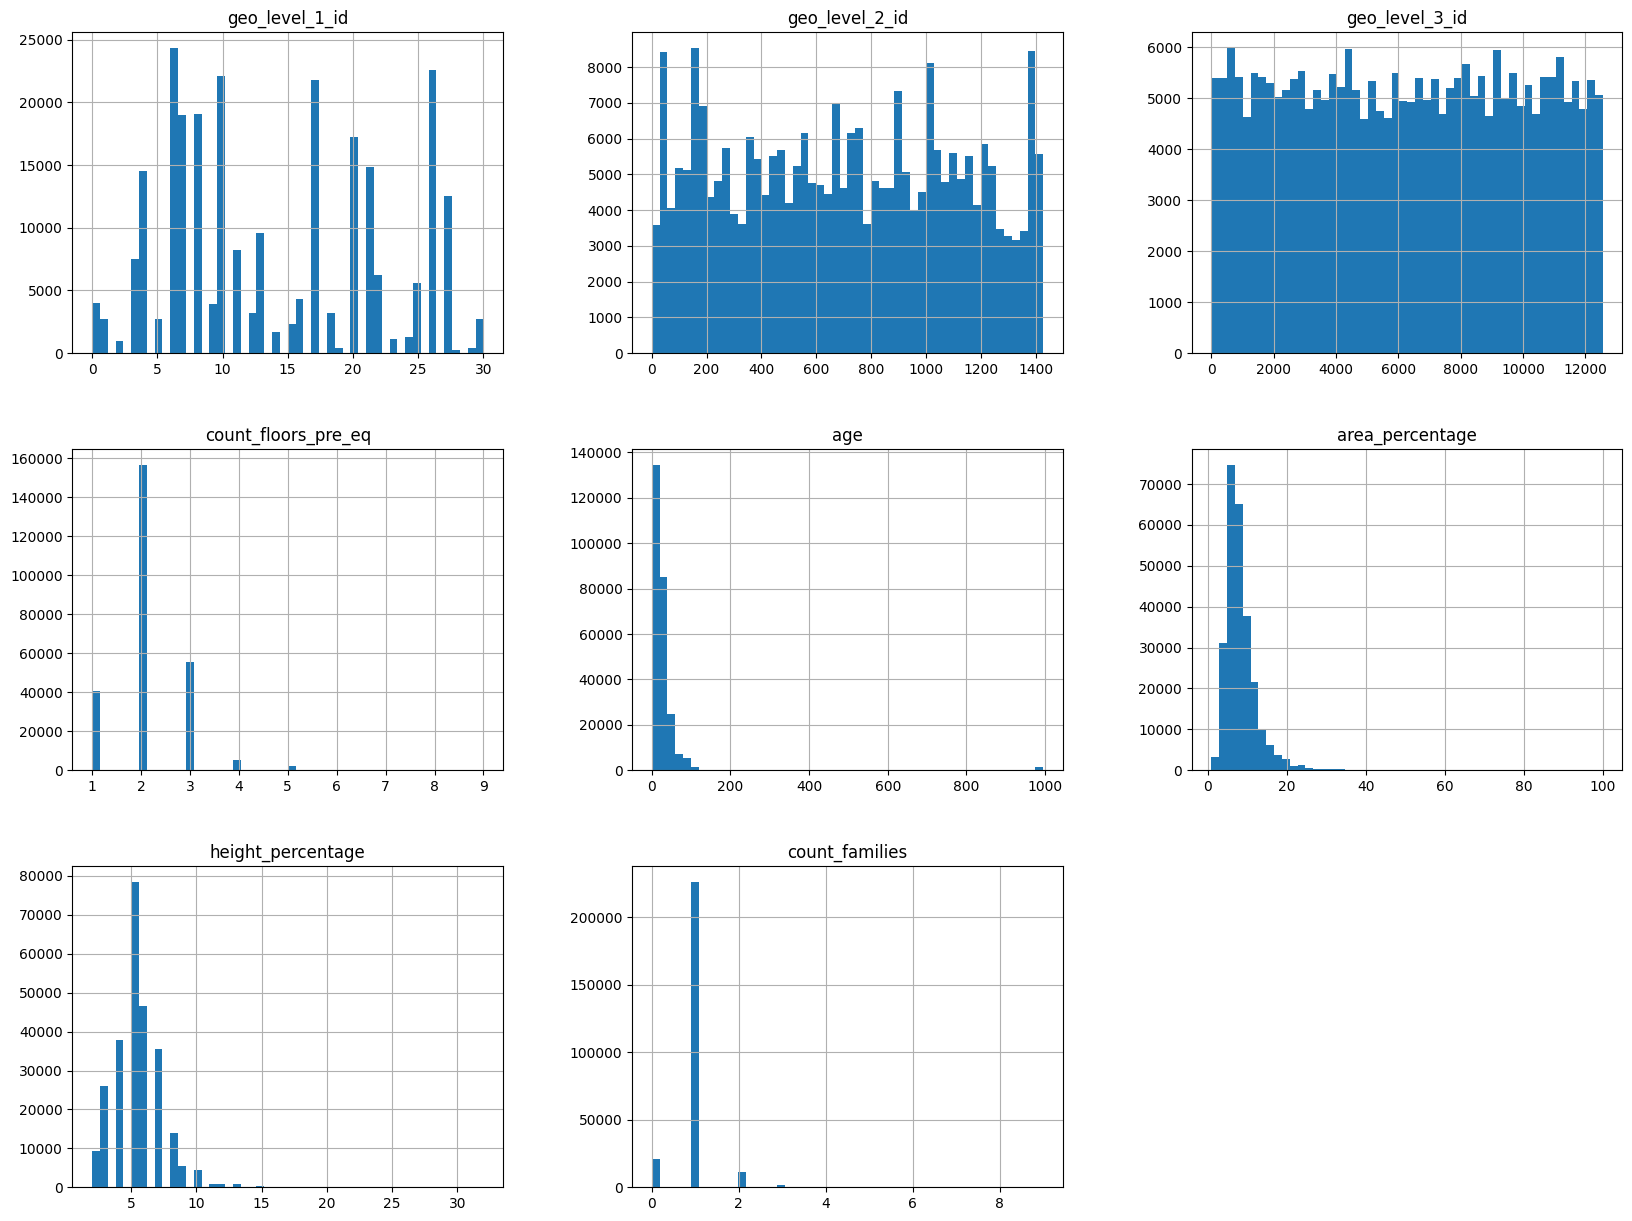

In [6]:
train_data_o.hist(bins=50, figsize=(20,15))
plt.show()

Some points can be highlighted:

<ul>
    <li>Most of buildings had 2 floors before the earthquake.</li>
    <li>Most of building had only 1 family living in. It's unlikely that the amount of families living in a building can be related to the damage caused by a earthquake. Perhaps the relationship between count of families and count of floors may bring some information.</li>
    <li>The buildings seem to be well distributed among the geographic regions. But it'll be interesting to see if the regions have more evident relationship with the <font color='blue'>damage_grade</font>.</li>
</ul>

Let's see how the damage is distributed among the regions in <font color='blue'>geo_level_1_id</font>:

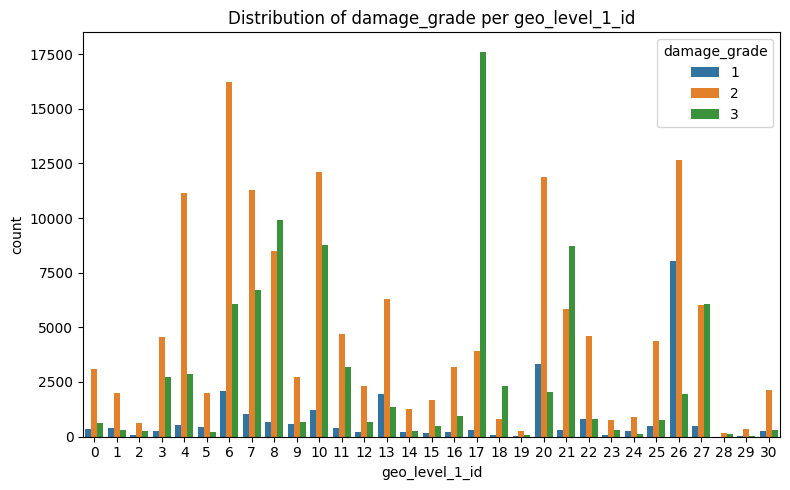

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(train_data_o[['geo_level_1_id']].join(label_data['damage_grade']),
           x='geo_level_1_id', hue='damage_grade', ax=ax)
ax.set_title('Distribution of damage_grade per geo_level_1_id')
fig.tight_layout()
plt.show()

It's easy to see that some regions have a predominance of some damage grades, for instance, in the regions 17 and 18 the <font color='blue'>damage_grade</font> 3 is predominant. There is no predominance of <font color='blue'>damage_grade</font> 1 in any region, although the region 26 has the higher percentage of <font color='blue'>damage_grade</font> 1 comparing to the others.

Now, let's take a step back and look at the distribution of the training dataset in terms of <font color='blue'>damage_grade</font>.

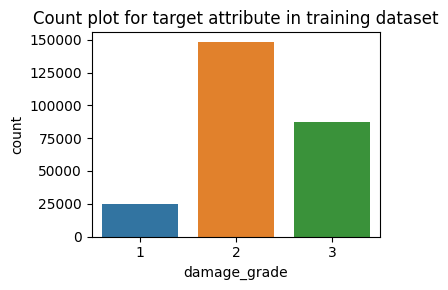

Damage_grade percentage of occurrences:


,percent
damage_grade,
1,9.640792
2,56.891186
3,33.468022


In [8]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(label_data, x='damage_grade',ax=ax)
ax.set_title('Count plot for target attribute in training dataset')
fig.tight_layout()
plt.show()
print('Damage_grade percentage of occurrences:')
data_len = label_data.shape[0]
label_data.groupby('damage_grade').apply(lambda x: 100*x.count()/data_len).rename(columns={'damage_grade':'percent'})

If all regions were equaly affected by the earthquake (taking no other attribute in consideration) a predominance of <font color='blue'>damage_grade</font> = 2 occurrences would be expected in all of them. It has been shown that it does not happen, so at least the <font color='blue'>geo_level_1_id</font> must be taken into account for the prediction.

Let's see the correlation between all ordinal attributes and the target variable.

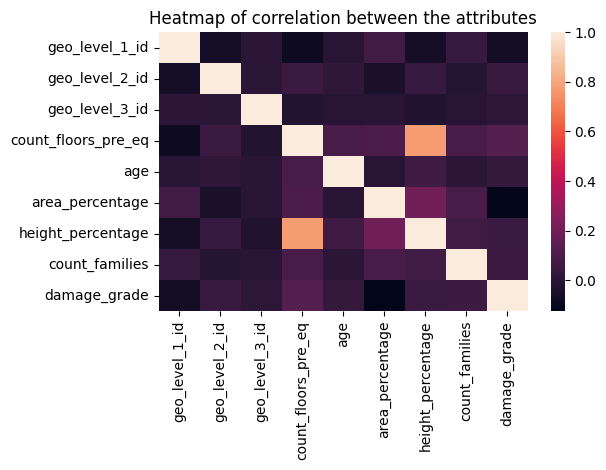

damage_grade           1.000000
count_floors_pre_eq    0.122308
count_families         0.056151
height_percentage      0.048130
geo_level_2_id         0.043161
age                    0.029273
geo_level_3_id         0.007932
geo_level_1_id        -0.072347
area_percentage       -0.125221
Name: damage_grade, dtype: float64

In [9]:
fig,ax = plt.subplots()
sns.heatmap(train_data_o.join(label_data['damage_grade']).corr(), ax=ax)
ax.set_title('Heatmap of correlation between the attributes')
fig.tight_layout()
plt.show()
train_data_o.join(label_data['damage_grade']).corr()['damage_grade'].sort_values(ascending=False)

They are poorly correlated. But this is simply a linear correlation, so it's possible that there are non-linear correlations between the attributes and the target.  

Let's look at the categorical attributes. We can split these attributes into three subsets: structural attributes, occupancy attributes (both binaries) and non-binary categorical attributes.

Structural attributes bring information about building composition and may affect the damage level. Therefore, it can be considered a asymmetric attribute, since the value 1 is more relevant than 0.

On the other hand, the occupancy attributes can be considered symmetric since both values (0 and 1) have the same relevance towards the <font color='blue'>damage_grade</font>.

Let's see the histogram of all binary attributes.

C:\Users\deric\AppData\Local\Temp\ipykernel_6976\614603772.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_data_c[cols].hist(ax=ax)


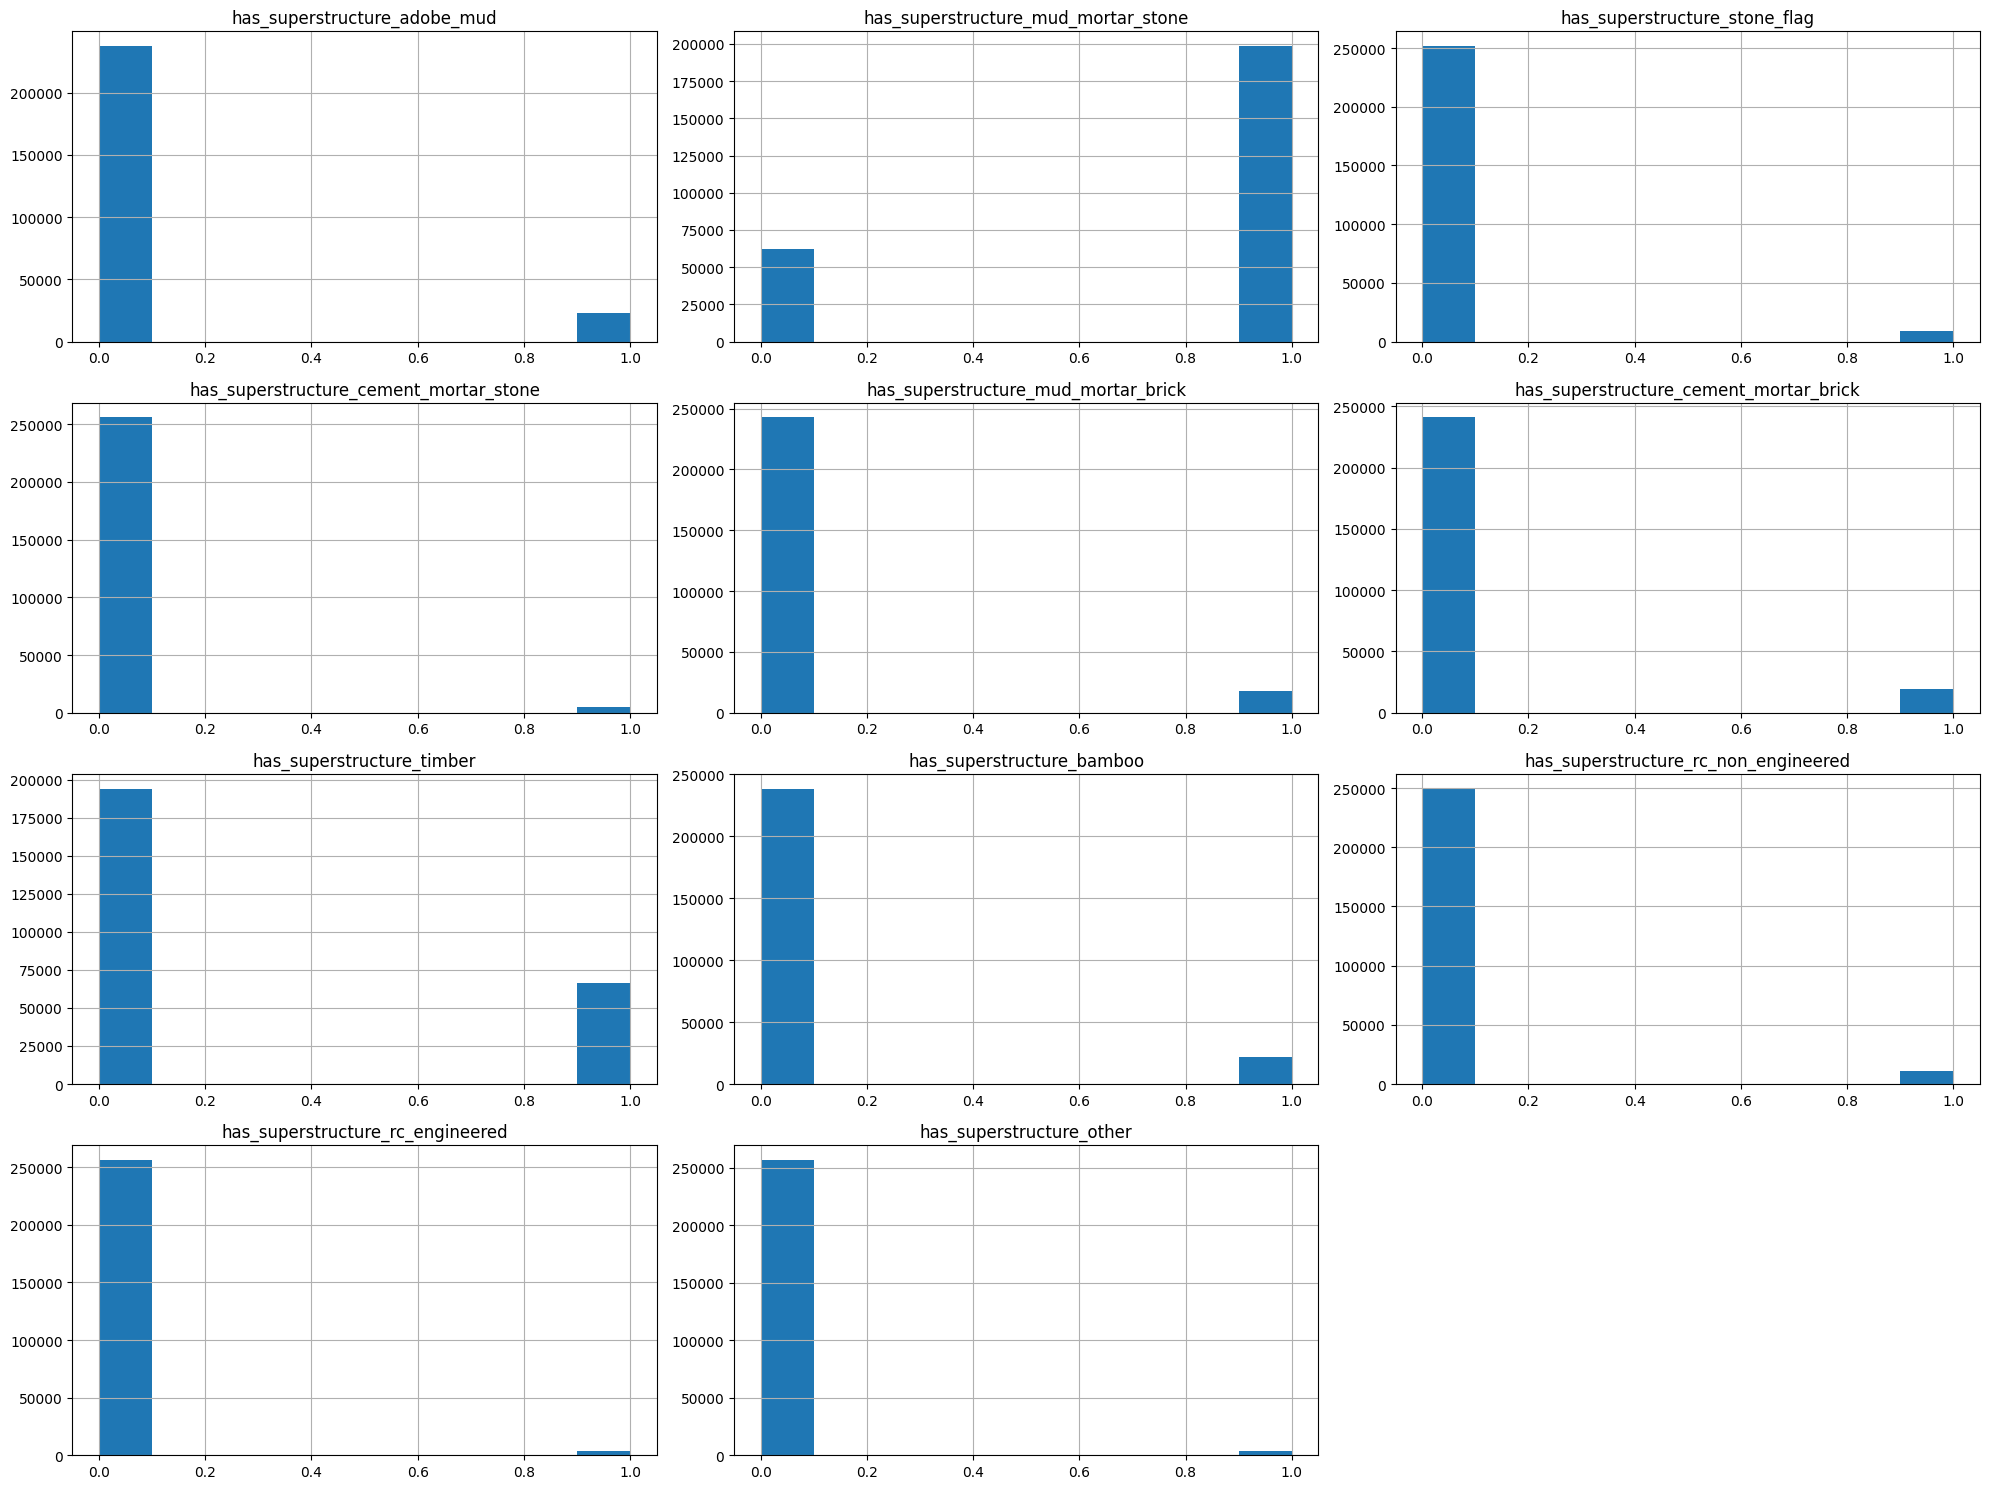

In [10]:
cols = [col for col in train_data_c.columns if 'has_superstructure' in col]
fig,ax = plt.subplots(figsize=(20,15))
train_data_c[cols].hist(ax=ax)
fig.tight_layout()
plt.show()
#train_data_c[cols].join(label_data['damage_grade']).corr()['damage_grade'].sort_values(ascending=False)

The attribute <font color='blue'>has_superstructure_mud_mortar_stone</font> is the only one wich has more 1 values than 0. All others are completely imbalanced, with few values equal to 1.

It's possible that some of these attributes have similar occurrences in data set. There are couple of ways to check this, for instance we can measure the similarity of theses attributes using the Jaccard similarity index. Measuring the jaccard index between all attribute pairs can be done subtracting 1 by the hamming distance as shown in the code bellow.

In [11]:
from sklearn.metrics.pairwise import pairwise_distances

jac_sim = 1 - pairwise_distances(train_data_c[cols].T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=cols, columns=cols)
jac_sim

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
has_superstructure_adobe_mud,1.000000,0.210210,0.883830,0.895246,0.900407,0.843800,0.704472,0.843243,0.872088,0.895695,0.903001
has_superstructure_mud_mortar_stone,0.210210,1.000000,0.250770,0.235732,0.193012,0.171715,0.356729,0.269615,0.222129,0.222482,0.241599
has_superstructure_stone_flag,0.883830,0.250770,1.000000,0.950503,0.899133,0.891366,0.748078,0.894463,0.926623,0.949923,0.954620
has_superstructure_cement_mortar_stone,0.895246,0.235732,0.950503,1.000000,0.915983,0.914801,0.737760,0.899555,0.944854,0.967326,0.967732
has_superstructure_mud_mortar_brick,0.900407,0.193012,0.899133,0.915983,1.000000,0.870914,0.711294,0.858385,0.892119,0.916478,0.920515
has_superstructure_cement_mortar_brick,0.843800,0.171715,0.891366,0.914801,0.870914,1.000000,0.694640,0.844433,0.903354,0.919241,0.911620
has_superstructure_timber,0.704472,0.356729,0.748078,0.737760,0.711294,0.694640,1.000000,0.809916,0.719322,0.729729,0.748723
has_superstructure_bamboo,0.843243,0.269615,0.894463,0.899555,0.858385,0.844433,0.809916,1.000000,0.881915,0.899229,0.910495
has_superstructure_rc_non_engineered,0.872088,0.222129,0.926623,0.944854,0.892119,0.903354,0.719322,0.881915,1.000000,0.942280,0.942794
has_superstructure_rc_engineered,0.895695,0.222482,0.949923,0.967326,0.916478,0.919241,0.729729,0.899229,0.942280,1.000000,0.969332


The majority of these attributes are very similar. Some pairs of attributes have similarity above 90%. As it would be expected the <font color='blue'>has_superstructure_mud_mortar_stone</font> is the only one wich has low similarity among the others.

Now let's make the same analysis to occupancy attributes.

C:\Users\deric\AppData\Local\Temp\ipykernel_6976\1593172094.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_data_c[cols].hist(ax=ax2)


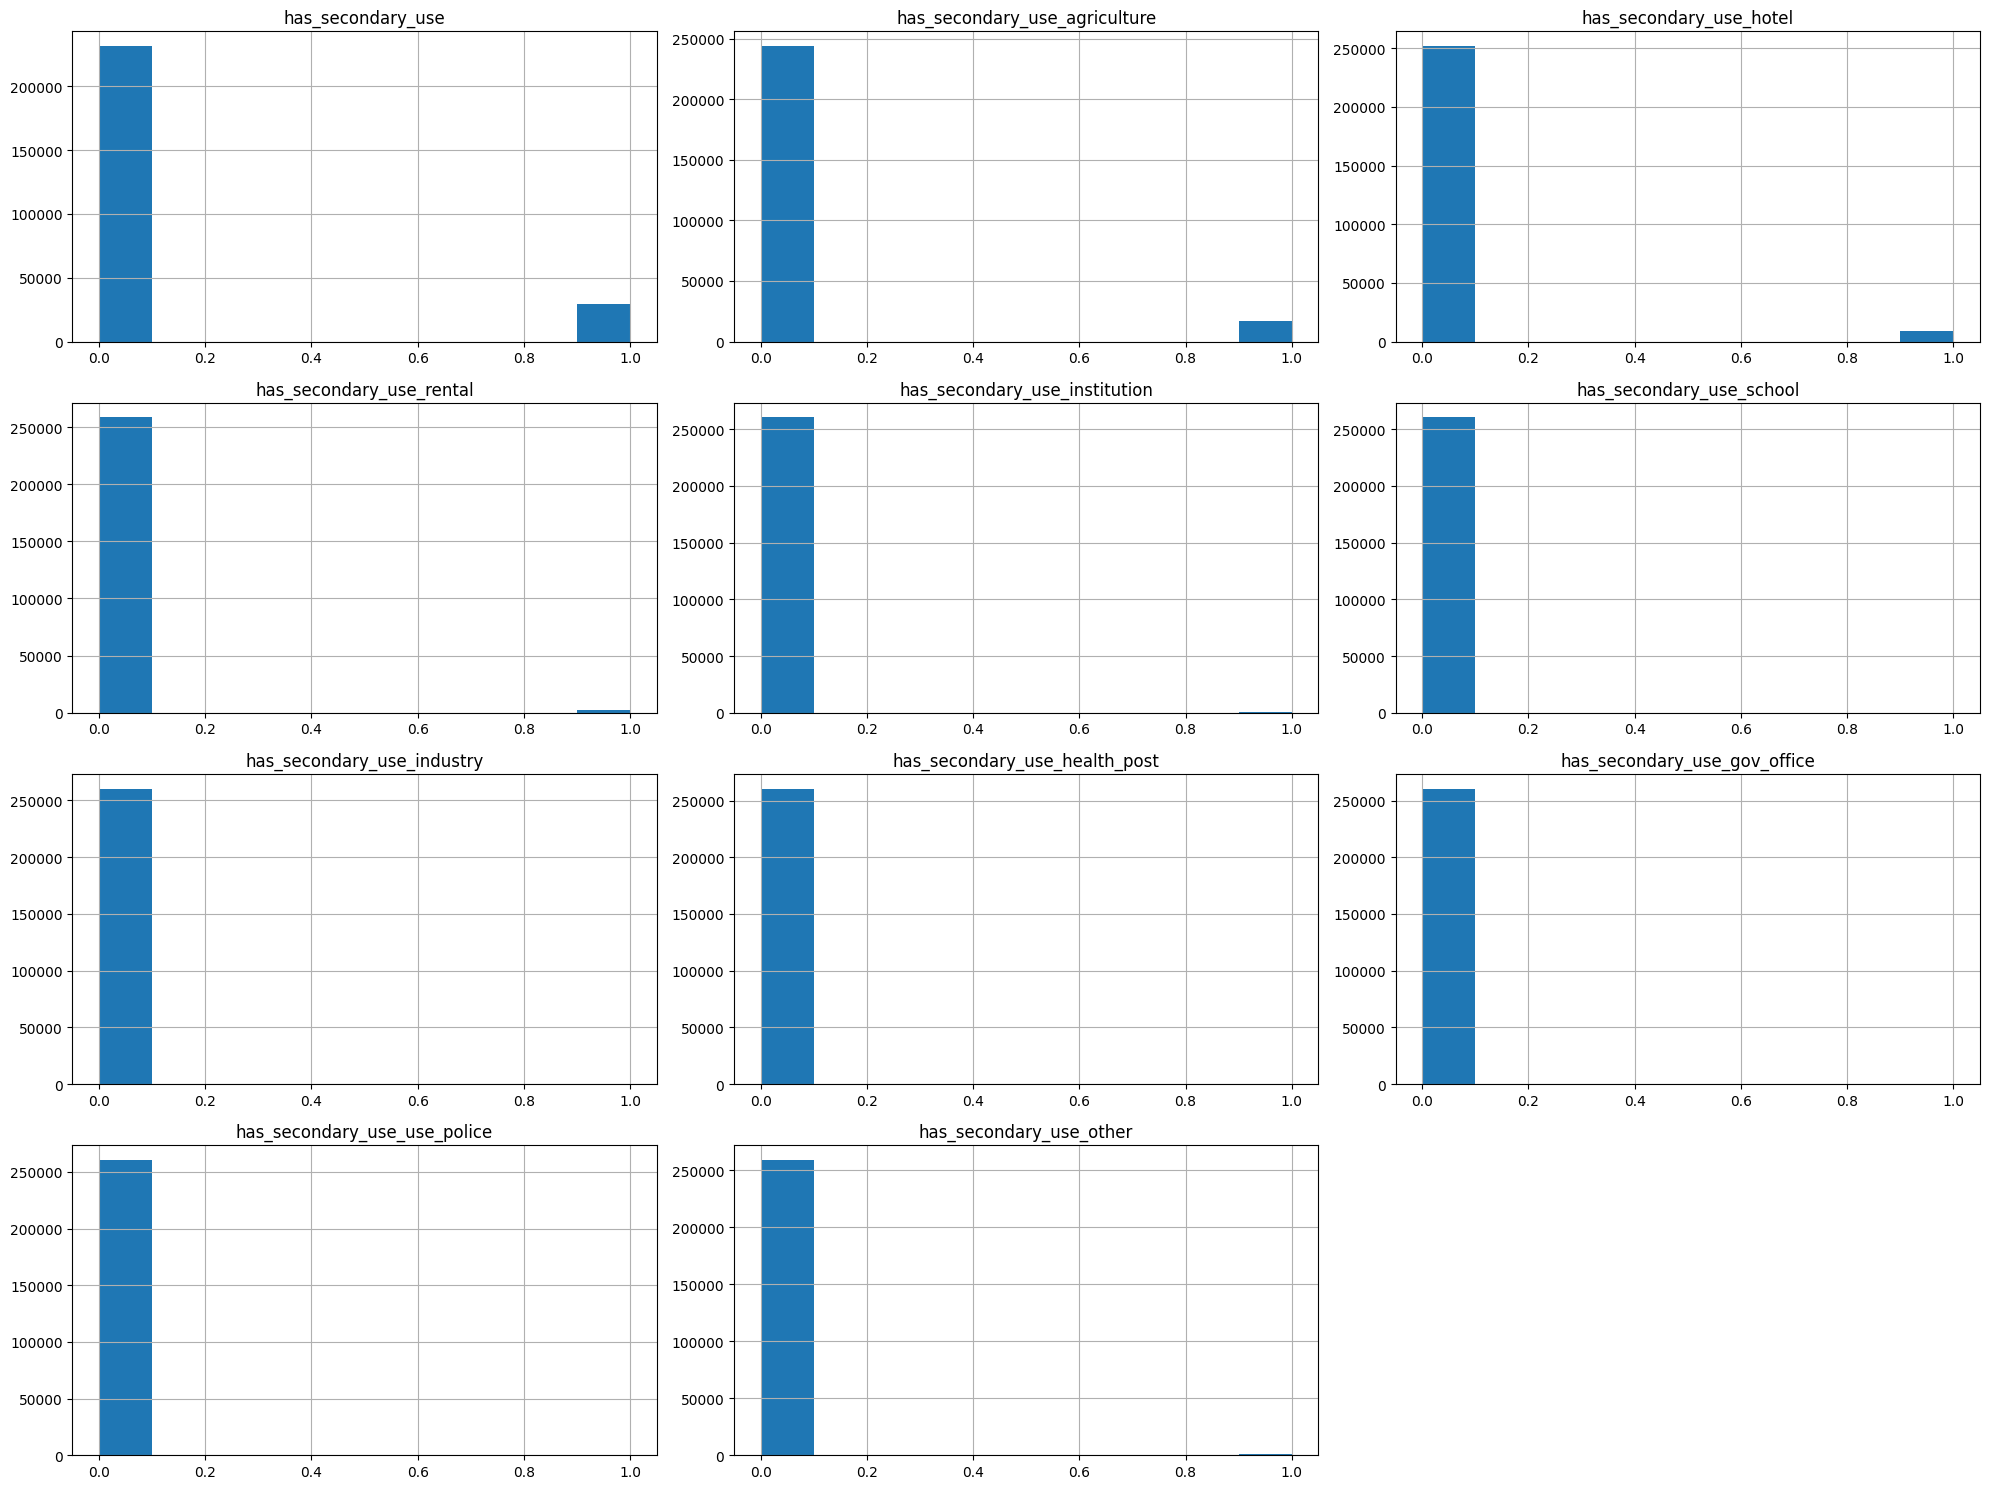

In [12]:
cols = [col for col in train_data_c.columns if 'has_secondary_use' in col]
fig2,ax2 = plt.subplots(figsize=(20,15))
train_data_c[cols].hist(ax=ax2)
fig2.tight_layout()
plt.show()

In [13]:
jac_sim = 1-pairwise_distances(train_data_c[cols].T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=cols, columns=cols)
jac_sim

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
has_secondary_use,1.000000,0.952498,0.921746,0.896221,0.889060,0.888481,0.889191,0.888308,0.888266,0.888208,0.893239
has_secondary_use_agriculture,0.952498,1.000000,0.901996,0.927521,0.934682,0.935261,0.934551,0.935434,0.935476,0.935534,0.934141
has_secondary_use_hotel,0.921746,0.901996,1.000000,0.958273,0.965434,0.966013,0.965303,0.966186,0.966228,0.966286,0.961700
has_secondary_use_rental,0.896221,0.927521,0.958273,1.000000,0.990959,0.991539,0.990829,0.991711,0.991754,0.991811,0.986896
has_secondary_use_institution,0.889060,0.934682,0.965434,0.990959,1.000000,0.998699,0.997989,0.998872,0.998914,0.998972,0.993972
has_secondary_use_school,0.888481,0.935261,0.966013,0.991539,0.998699,1.000000,0.998569,0.999451,0.999493,0.999551,0.994528
has_secondary_use_industry,0.889191,0.934551,0.965303,0.990829,0.997989,0.998569,1.000000,0.998741,0.998784,0.998841,0.993841
has_secondary_use_health_post,0.888308,0.935434,0.966186,0.991711,0.998872,0.999451,0.998741,1.000000,0.999666,0.999724,0.994693
has_secondary_use_gov_office,0.888266,0.935476,0.966228,0.991754,0.998914,0.999493,0.998784,0.999666,1.000000,0.999766,0.994743
has_secondary_use_use_police,0.888208,0.935534,0.966286,0.991811,0.998972,0.999551,0.998841,0.999724,0.999766,1.000000,0.994793


These attributes are even more imbalanced than those structural attributes, having a immense majority of occurences equal to 0. Some pairs of attributes have similarity above 99%.
Since they are very similar, we may initialy select the attribute <font color='blue'>has_secondary_use</font> and discard the others.

At last I am going to see the distribution of non-binary category attributes grouped by the <font color='blue'>damage_grade</font>. 


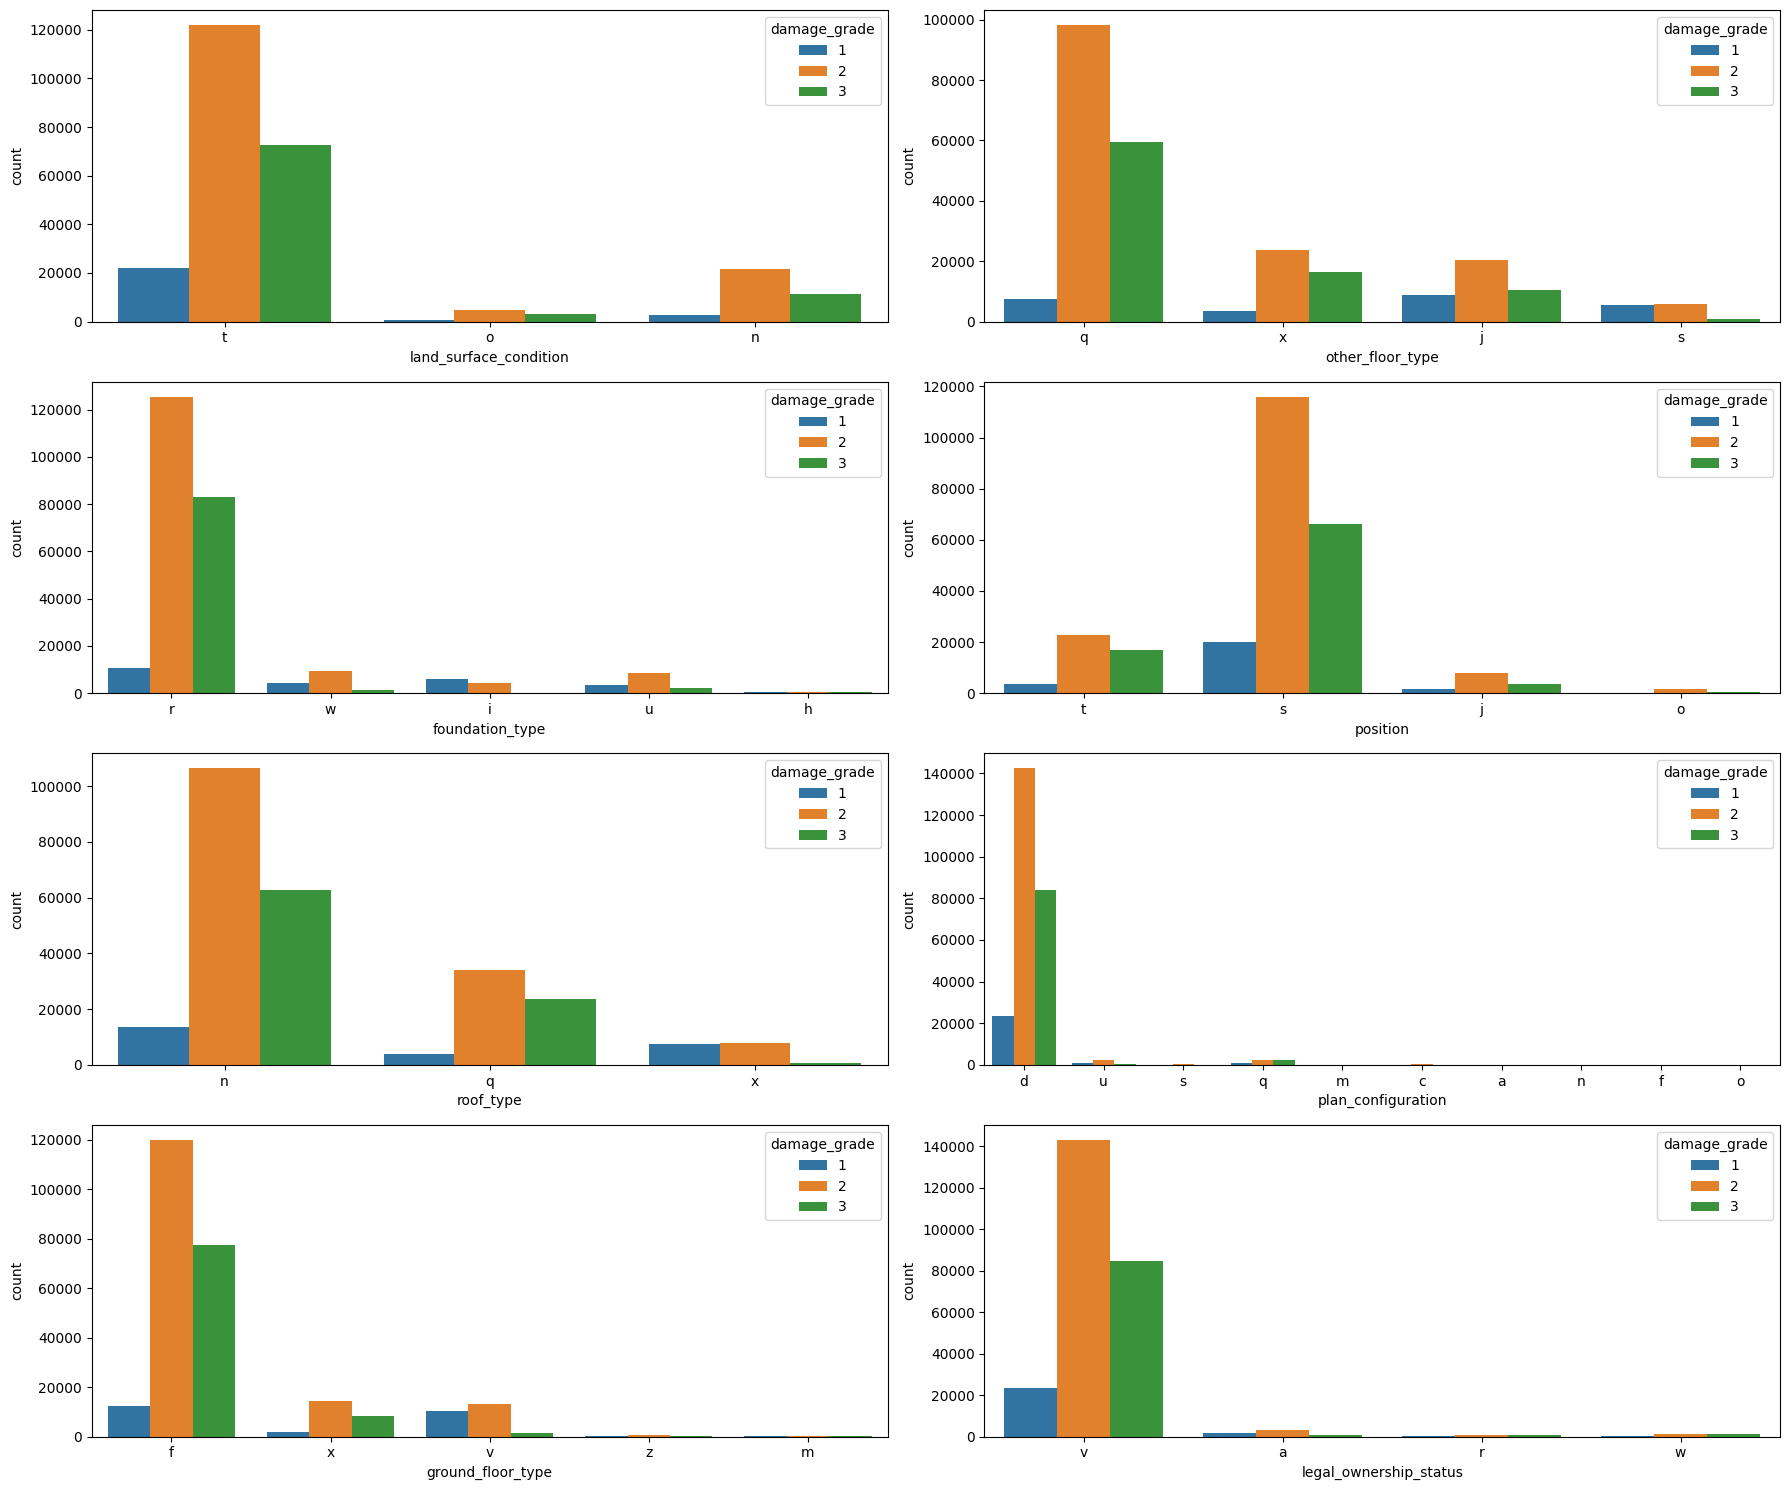

In [14]:
cols = train_data_c.select_dtypes(include=['object']).columns
fig,axs = plt.subplots(4,2, figsize=(18,15))
aux = 0
for i in range(0,2):
    for j in range(0,4):
        sns.countplot(train_data_c.join(label_data['damage_grade']), hue='damage_grade', x=cols[aux], ax=axs[j][i])
        aux+=1
fig.tight_layout()
plt.show()


The <font color='blue'>plan_configuration</font> and <font color='blue'>legal_ownership_status</font> are the most imbalanced attributes having the majority of occurrences in one category.

For <font color='blue'>ground_floor_type</font> the category <font color='blue'>v</font> has a predominance of occurrences of damage leve 1 and 2. The same aspect can be observed for <font color='blue'>roof_type</font> category <font color='blue'>x</font> and <font color='blue'>foundation_type</font> category <font color='blue'>i</font>.

<h3>Dataset Preprocessing</h3>

Once I know a little bit more about the training dataset, it's time to prepare the dataset for training a model.

I've seen that it is not necessary to handle with missing values. In general, codifying the non-binary categorical attributes and normalizing the ordinal attributes are two basic steps in preprocessing.

The One-Hot Codification is going to be applied on non-binary attributes since each of them have low cardinality (max 5 categories) except for <font color='blue'>plan_configuration</font>. 

In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

#testing the encoder with attribute: land_surface_condition
coded_attr = cat_encoder.fit_transform(train_data_c[['land_surface_condition']])
coded_attr


<260601x3 sparse matrix of type '<class 'numpy.float64'>'
	with 260601 stored elements in Compressed Sparse Row format>

For the <font color='blue'>land_surface_condition</font> which has 3 categories, the One-Hot enconder generates a sparse matrix with size = (260601 occurrences x 3 categories).

To help me to decide which scaler I should use in ordinal attributes, it's important to analyze the statistics previously seen. For this purpose the box plot may be a better tool.

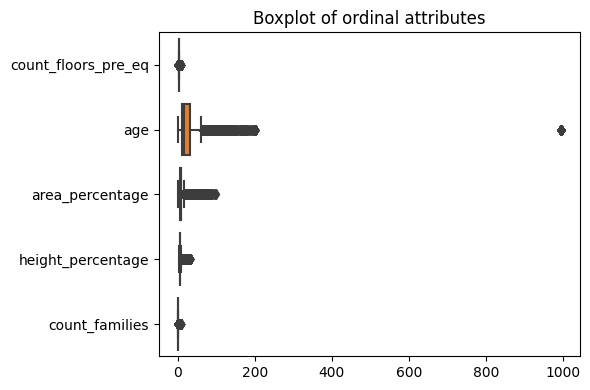

In [16]:
#boxplot
fig,ax = plt.subplots(figsize=(6,4))
sns.boxplot(data=train_data_o.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id'], axis=1, inplace=False), orient='h', ax=ax)
ax.set_title('Boxplot of ordinal attributes')
fig.tight_layout()
plt.show()

There are couple of outliers from <font color='blue'>age</font> near the value 1000, therefore the use of Standard Scaler, since it is less affected by outliers, is more preferred than Min-Max Scaler.

Although the <font color='blue'>geo_level_1_id</font> is a numerical attribute, it can be considered a categorical attribute as well, so it will not be scaled.

Before numerical scaling, new features may be created to try to improve the correlation with target attribute. They are:
<ul>
    <li>Height per area of the building</li>
    <li>Count families per building area</li>
    <li>Count families per building count floors</li>
</ul>

In [17]:
temp_data = train_data_o.copy()
temp_data['h_per_a'] = train_data_o['height_percentage']/train_data_o['area_percentage']
temp_data['family_per_area'] = train_data_o['count_families']/train_data_o['area_percentage']
temp_data['family_per_floors'] = train_data_o['count_families']/train_data_o['count_floors_pre_eq']
temp_data.join(label_data['damage_grade']).corr()['damage_grade'].sort_values(ascending=False)

damage_grade           1.000000
count_floors_pre_eq    0.122308
h_per_a                0.108787
family_per_area        0.092572
count_families         0.056151
height_percentage      0.048130
geo_level_2_id         0.043161
age                    0.029273
geo_level_3_id         0.007932
family_per_floors     -0.066174
geo_level_1_id        -0.072347
area_percentage       -0.125221
Name: damage_grade, dtype: float64

The new attributes are not so promising cause they still have low correlation with the target variable. But, <font color='blue'>h_per_a</font> and <font color='blue'>family_per_area</font> will be kept.

A custom function will be done to implement the attributes creation and will be part of a preprocessing pipeline for numerical attributes.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
#OneToOneFeatureMixin provides get_feature_names_out()

#customizing a class to create new numerical features
class NewFeaturesAdder(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
#it is not necessary to pass the list of attribute names to constructor since we already know
#the dataframe columns, but I want to try this approach just for learning purpose 
    def __init__(self, idcols):
        self.idcols = idcols
        self.feature_names_in_ = []
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['h_per_a'] = X[self.idcols[1]]/X[self.idcols[0]]
        X['family_per_area'] = X[self.idcols[2]]/X[self.idcols[0]]
        #feature_names_in will be returned in get_feature_names_out
        self.feature_names_in_ = list(X.columns.values)
        return X
    

Before applying the pipeline for preprocessing the training dataset, I need to take a step back and split this set in training and validation subsets. The validation set will be 20% of the whole set. As the target attribute in the training is almost imbalanced, it's necessary to use a stratified split to ensure that all 3 classes of <font color='blue'>damage_grade</font> will have equal distribution of occurrences within the subsets.

It is very important to split the training set before the preprocessing to avoid any type of data leakage from the validation set.

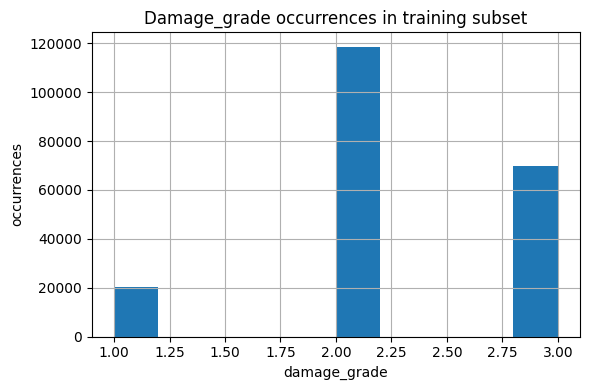

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#split the training dataset stratifying by damage_grade
for train_index, test_index in splitter.split(train_data,label_data):
    strat_train_set = train_data.iloc[train_index]
    strat_val_set = train_data.iloc[test_index]
    label_train_set = label_data.iloc[train_index]
    label_val_set = label_data.iloc[test_index]

fig,ax = plt.subplots(figsize=(6,4))
label_train_set[['damage_grade']].hist(ax=ax)
ax.set_xlabel('damage_grade')
ax.set_ylabel('occurrences')
ax.set_title('Damage_grade occurrences in training subset')
fig.tight_layout()
plt.show()

I made a numerical pipeline for ordinal attributes. Now I'm going to create a full pipeline, composed by the numerical pipeline and the encoder for categorical attributes. The last step in pipeline will consist of dropping the undesired attributes.

In [20]:
from sklearn.compose import ColumnTransformer

#attributes I want to drop
del_attrs = ['geo_level_2_id','geo_level_3_id']
#get names of numerical attributes for pipeline
num_attrs = list(ord_attrs.values)
for d in del_attrs:
    num_attrs.remove(d)
num_attrs.remove('geo_level_1_id')

#get the column indexes for the attributes will be used to NewFeaturesAdder() 
cls = ['area_percentage','height_percentage','count_families']

#add more attributes to be dropped
del_attrs += [col for col in train_data_c.columns if 'has_secondary_use_' in col]

#pipeline for numerical attributes preprocessing
attr_adder = NewFeaturesAdder(idcols=cls)
num_pipeline = Pipeline([
    ('attrs_adder', attr_adder),
    ('std_scaler', StandardScaler()),
])
#get a list of categorical attributes
cat_attrs = list(train_data_c.select_dtypes(include=['object']).columns)

#composing the full pipeline with columntransformer using
#numerical pipeline for ordinal attributes, one-hot encoding for categorical attributes 
#and dropping the unused attributes
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs),
    ('drop', 'drop', del_attrs)],remainder='passthrough',verbose_feature_names_out=True)

train_data_prepared = full_pipeline.fit_transform(strat_train_set)

print("Data is preprocessed!")

Data is preprocessed!


In [21]:
#get the column names after each transformation
new_columns = list(full_pipeline.named_transformers_['num'].get_feature_names_out())
new_columns += list(full_pipeline.named_transformers_['cat'].get_feature_names_out())
new_columns += list(strat_train_set.columns[full_pipeline.transformers_[3][2]]) #transformers_[3] is the remainder

Now, I'm going to use the prepared data with the same model in the Benchmark page of the competition: https://drivendata.co/blog/richters-predictor-benchmark/.

The following image shows the insample f1-score for training set in benchmark.
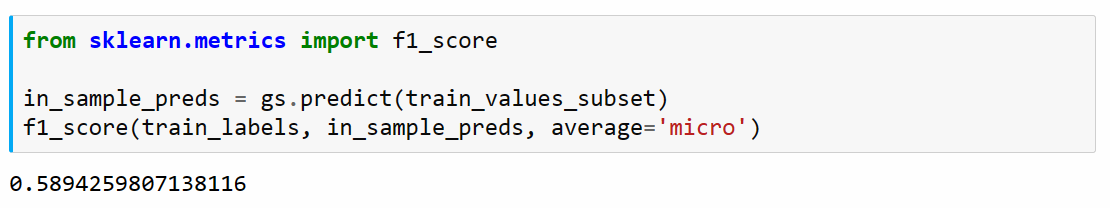

Let's see how the model used in benchmark performs with the prepared data.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#I decided to keep the code as the same as in the bechmark page
pipe = make_pipeline(full_pipeline, 
                     RandomForestClassifier(random_state=2018))
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)
gs.fit(X=strat_train_set, y=label_train_set['damage_grade'].values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('attrs_adder',
                                                                                          NewFeaturesAdder(idcols=['area_percentage',
                                                                                                                   'height_percentage',
                                                                                                                   'count_families'])),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['count_floors_pre_eq',
                                                                          'age',
                                                                          'area_percentage',
                                                                          'height_percentage',
                                                                          'count_...
                                                                          'has_secondary_use_school',
                                                                          'has_secondary_use_industry',
                                                                          'has_secondary_use_health_post',
                                                                          'has_secondary_use_gov_office',
                                                                          'has_secondary_use_use_police',
                                                                          'has_secondary_use_other'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2018))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [23]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__n_estimators': 100}

In [24]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(strat_train_set)
f1_score(label_train_set['damage_grade'].values, in_sample_preds, average='micro')

0.7312404067536453

The insample f1-score is much better, using the same model but with a little bit more preprocessing than in benchmark.

Now, let's use the validation set I split before.

In [25]:
#testing validation set
val_sample_preds = gs.predict(strat_val_set)
f1_score(label_val_set['damage_grade'].values, val_sample_preds, average='micro')

0.6886283839527254

I small loss of performance. But it would be expected since insample score measure the performance with the dataset the model was trained on.

It's possible to see the order of importance of each attribute in best random forest estimator found by the grid search:

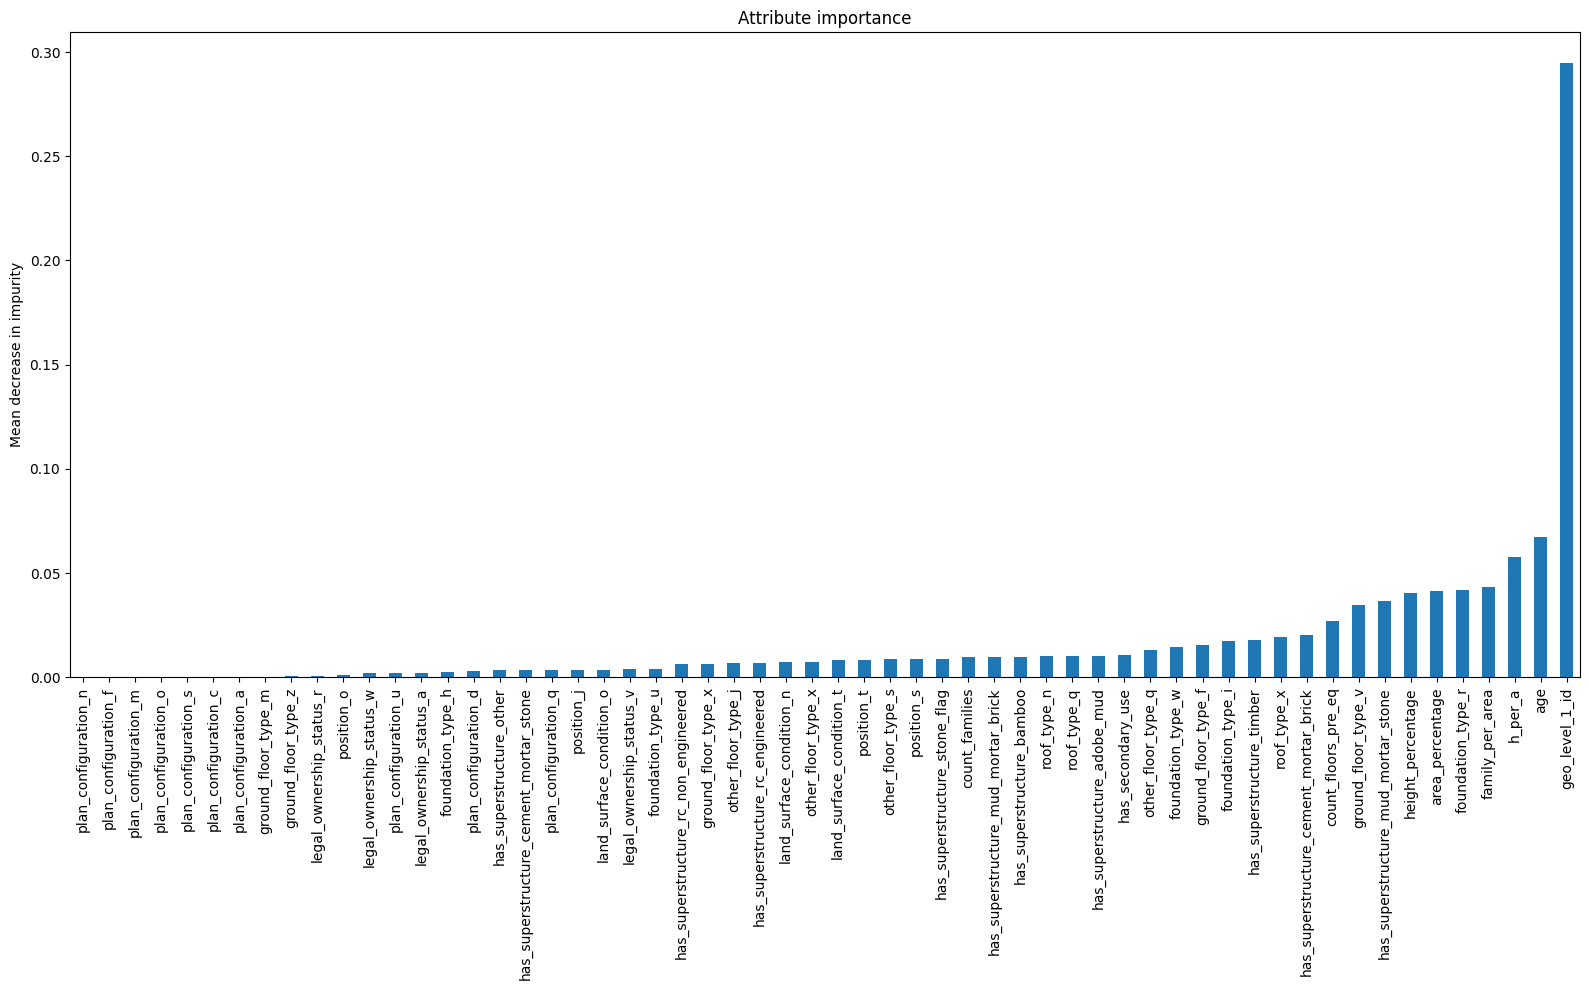

In [26]:
attrs_importances = pd.Series(gs.best_estimator_.named_steps['randomforestclassifier'].feature_importances_, index=new_columns)
fig, ax = plt.subplots(figsize=(16,10))
attrs_importances.sort_values(ascending=True).plot.bar(ax=ax)
ax.set_title("Attribute importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The <font color='blue'>geo_level_1_id</font> has the highest importance among the attributes. (It's important to remember that this attribute has not been scaled.)

To finish this notebook, I'm going to make prediction with test dataset and submit the answers to the competition.

In [27]:
submission_file = os.path.join(data_path,'submission_format.csv')
test_data = pd.read_csv(test_data_file, index_col='building_id')

predictions = gs.predict(test_data)

submission_format = pd.read_csv(submission_file, index_col='building_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [28]:
submission_final = os.path.join(data_path,'submission.csv')
my_submission.to_csv(submission_final)

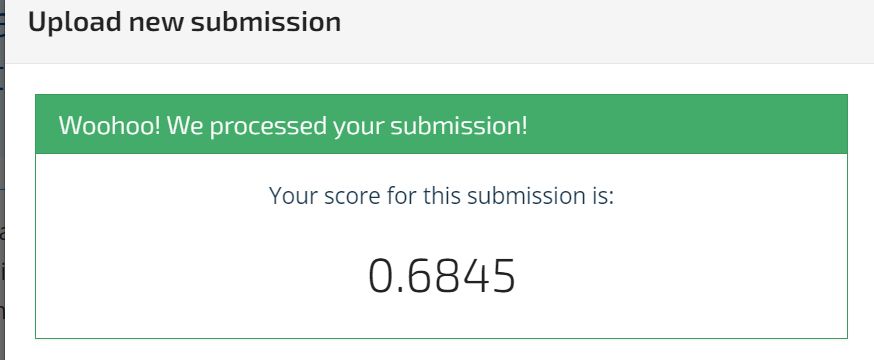

It's a good score for my first submission, without any model improvement, just data analysis and preprocessing!